# Laboration 1 - Ekvationer och Differensformler

#### Eric Johansson, Can Kupeli, Samuel Greenberg

In [61]:
import math
import numpy as np
import sympy as sp 
from matplotlib import pyplot as plt 

## Uppgift 1

In [62]:
def f(x):
	return (math.sqrt(math.pow(x-5,5))+2*math.cos(math.pi*math.sqrt(x)))/(math.sqrt(x+4*math.log(x-math.pi))-1)

def forward_diff(x,h):
	return (f(x+h)-f(x))/h

def center_diff(x,h):
	return (f(x+h)-f(x-h))/(2*h)

x0 = 7
for h in [0.04, 0.02, 0.01]:
	print(f"Framåtderivatan  med h={h} => {forward_diff(x0,h)}")
	print(f"Centralderivatan med h={h} => {center_diff(x0,h)}")

Framåtderivatan  med h=0.04 => 2.2009998703276854
Centralderivatan med h=0.04 => 2.164862077706964
Framåtderivatan  med h=0.02 => 2.1829004610484315
Centralderivatan med h=0.02 => 2.1648314358760854
Framåtderivatan  med h=0.01 => 2.173858304372933
Centralderivatan med h=0.01 => 2.164823775679292


Resultaten visar att $D2$, centraldifferensen, är närmre det verkliga värdet av $f'(x_0)$. Detta är eftersom den har feltermen
$O(h^2)$ medan framåtdiffensen har $O(h)$. Eftersom $h<1$ kommer feltermen i $O(h^2)$ konvergera mot $0$ snabbare än $O(h)$.

## Uppgift 2

In [70]:
x = sp.symbols("x")
f_syms = (sp.sqrt((x-5)**5) + 2*sp.cos(sp.pi*sp.sqrt(x)))/(sp.sqrt(x+4*sp.log(x-sp.pi))-1)
f_prim = f_syms.diff()
f_prim_x0 = f_prim.subs(x,x0)
print(f"Exakta värdet av f'(7) är {f_prim_x0.evalf(16)}")

Exakta värdet av f'(7) är 2.164821222303575


Svaret blev 2.164821222303575 vilket är samma som det i instruktionen. Att arbeta symboliskt betyder att datorn hanterar $x$ som en symbol istället för ett värde som den gör när vi arbetar numeriskt. Det är därför vi behöver byta ut x mot 7 (subs(x,7)) för att få ut ett numeriskt uttryck.

## Uppgift 3

In [68]:
# f kommer från Uppgift 1
h = 2e-2
k1= 2*(2*f(x0+h/2)-f(x0+h)-f(x0))/(h**2)

f_prim_x0 = (f(x0+h)-f(x0))/h+k1*h
print(f"Uppskattade värdet av f'({x0}) med extrapolering är {f_prim_x0}")

Uppskattade värdet av f'(7) med extrapolering är 0.4570086859780442


Eftersom $h$ fortfarande är relativt stort kommer det fortfarande ifrån det riktiga värdet. Det är trots allt fortfarande en approximation

## Uppgift 4

In [71]:
# f kommer från Uppgift 1, f_prim kommer från Uppgift 2, x0 från Uppgift 1, h kommer från Uppgift 3

# Vanlig numerisk
def forward_biss(x,h):
    return (f(x-h)-2*f(x)+f(x+h))/(h**2)

print(f"Fbiss =>  {forward_biss(x0,h)}")
# Extrapolerad numerisk
k2 = (8*f(x0+h/2)+8*f(x0-h/2)-12*f(x0)-2*f(x0+h)-2*f(x0-h))/(h**3)
print(f"Fbiss med extrapolering => {forward_biss(x0,h)+k2*h}")

# Symbolisk
f_biss = f_prim.diff()
f_biss_x0 = f_biss.subs(x,7)
print(f'Exakta värdet av f"(7) = {f_biss_x0.evalf(16)}')


Fbiss =>  0.753877124602953
Fbiss med extrapolering => 0.7539148190927047
Exakta värdet av f"(7) = 1.806906812550099


$$     f''(x)-f''(x) = \frac{f(x-h)-2f(x)+f(x+h)}{h^2}+kh-\left( \frac{f(x-\frac{h}{2})-2f(x)+f(x+\frac{h}{2})}{\frac{h^2}{4}}+\frac{kh}{2}\right) $$

$$     0 = \frac{f(x-h)-2f(x)+f(x+h)}{h^2}+kh- \frac{f(x-\frac{h}{2})-2f(x)+f(x+\frac{h}{2})}{\frac{h^2}{4}}-\frac{kh}{2} $$

$$    \frac{kh}{2}-kh = \frac{f(x-h)-2f(x)+f(x+h)}{h^2}- \frac{f(x-\frac{h}{2})-2f(x)+f(x+\frac{h}{2})}{\frac{h^2}{4}} $$

$$    -\frac{kh}{2} = \frac{f(x-h)-2f(x)+f(x+h)}{h^2}- \frac{4\left(f(x-\frac{h}{2})-2f(x)+f(x+\frac{h}{2})\right)}{h^2} $$

$$    -\frac{kh}{2} = \frac{f(x-h)-4f(x-\frac{h}{2})+6f(x)+f(x+h)-4f(x+\frac{h}{2})}{h^2} $$

$$    -k =  \frac{2f(x-h)-8f(x-\frac{h}{2})+12f(x)+2f(x+h)-8f(x+\frac{h}{2})}{h^3} $$

$$    k =  \frac{-2f(x-h)+8f(x-\frac{h}{2})-12f(x)-2f(x+h)+8f(x+\frac{h}{2})}{h^3} $$

$$    k =  \frac{8f(x+\frac{h}{2})+8f(x-\frac{h}{2})-12f(x)-2f(x+h)-2f(x-h)}{h^3} $$


Uträkning för extrapolering.



## Uppgift 5

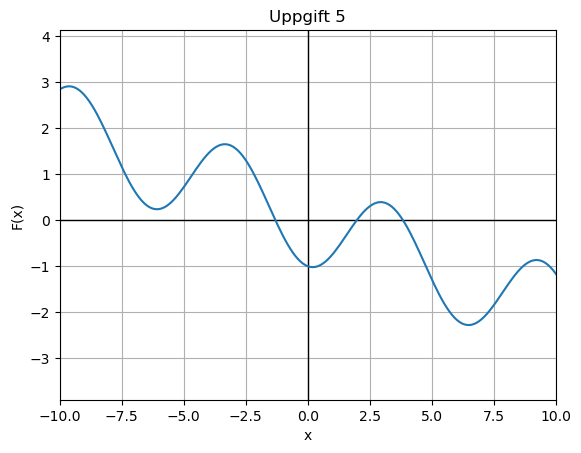

In [66]:
# Array från -15 till 15 med steglängd 0.1
x = np.arange(-15,15,0.1)

# Funktion-stil
def F(x):
	return -x/5-np.cos(x)

# Numpy-stil
y = -x/5-np.cos(x)

# Plot styling
plt.title("Uppgift 5") 
plt.xlabel("x") 
plt.ylabel("F(x)") 
plt.xlim(-10,10) 
plt.grid()
plt.axhline(linewidth = 1, color = "black")
plt.axvline(linewidth = 1, color = "black")


#plt.plot(x,F(x))
plt.plot(x,y)
plt.show()


Vi kan se att det finns 3 nollställen nära -1.75, 2.2 och 4

## Uppgift 6

In [67]:
# Lambdastil
f = lambda x: -x/5 - np.cos(x)
f_prim = lambda x: -1/5 + np.sin(x)

# Vanlig funktionsstil

#def f(x):
#	return -x/5-math.cos(x)

# def f_prim(x):
# 	return -1/5+math.sin(x)

tolerance = 1e-6
def newton_rhapson(f, f_prim, x0, tolerance):
	newton_rhapson.counter += 1
	if abs(f(x0)) < tolerance:
		return x0 
	else:
		return newton_rhapson(f,f_prim,x0 - f(x0)/f_prim(x0),tolerance)

newton_rhapson.counter = 0
print(f"Estimate when starting at 2 = {newton_rhapson(f,f_prim, 4 ,tolerance)} and took {newton_rhapson.counter} iterations with tolerance {tolerance}")

Estimate when starting at 2 = 3.837467107273312 and took 4 iterations with tolerance 1e-06


## Uppgift 7

In [11]:
# f kommer från Uppgift 6

def secant_method(f,left,right,tolerance):
	secant_method.counter += 1
	if abs(left-right) < tolerance:
		return left
	else:
		return secant_method(f,right, left-((left-right)*f(left))/(f(left)-f(right)), tolerance)

secant_method.counter = 0
print(f"Estimate when starting at 4 and 5 = {secant_method(f,4, 5 ,tolerance)} and took {secant_method.counter} iterations with tolerance {tolerance}")

Estimate when starting at 4 and 5 = 3.837467525012162 and took 6 iterations


## Uppgift 8

In [16]:
f = sp.sympify("-x/5-cos(x)")
print(f"Nollställe nr 1: {sp.nsolve(f,4)}")
print(f"Nollställe nr 2: {sp.nsolve(f,-1)}")
print(f"Nollställe nr 3: {sp.nsolve(f,2)}")

Nollställe nr 1: 3.83746710649905
Nollställe nr 2: -1.30644000836951
Nollställe nr 3: 1.97738302932884
